<a href="https://colab.research.google.com/github/AnalyticsKnight/yemoonsaBigdata/blob/dev/src/P2_C3_HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3. 빅데이터 분석 실무**

In [1]:
!git clone https://github.com/AnalyticsKnight/yemoonsaBigdata/

Cloning into 'yemoonsaBigdata'...
remote: Enumerating objects: 462, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 462 (delta 59), reused 43 (delta 43), pack-reused 363
Receiving objects: 100% (462/462), 8.40 MiB | 23.25 MiB/s, done.
Resolving deltas: 100% (244/244), done.


## 1. 데이터 수집

### (1) 사용 데이터

### (2) 데이터 로딩

#### 312-01 : csv파일 불러오기

In [2]:
import pandas as pd

data = pd.read_csv("./yemoonsaBigdata/datasets/Part2/housing_data.csv", header=None, sep=',') 
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'isHighValue']
data.columns = col_names

#### 312-02 : head 함수

In [3]:
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  isHighValue  
0     15.3  396.90   4.98  24.0            0  
1     17.8  396.90   9.14  21.6            0  
2     17.8  392.83   4.03  34.7            1  
3     18.7  394.63   2.94  33.4            1  
4     18.7  396.90   5.33  36.2            1  


## 2. 데이터 전처리

### (1) 데이터 확인

#### 321-01 : shape 함수

In [4]:
print(data.shape)

(526, 15)


#### 321-02 : info 함수

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           526 non-null    float64
 2   INDUS        526 non-null    float64
 3   CHAS         526 non-null    int64  
 4   NOX          526 non-null    float64
 5   RM           526 non-null    float64
 6   AGE          526 non-null    float64
 7   DIS          526 non-null    float64
 8   RAD          526 non-null    int64  
 9   TAX          526 non-null    float64
 10  PTRATIO      526 non-null    float64
 11  B            526 non-null    float64
 12  LSTAT        526 non-null    float64
 13  MEDV         526 non-null    float64
 14  isHighValue  526 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.8 KB
None


#### 321-03 : describe 함수

In [6]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean     3.613524   10.931559   11.306616    0.066540    0.555954    6.271076   
std      8.601545   22.977112    6.934739    0.249461    0.113854    0.698140   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.453000    5.879250   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.183500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.613500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    68.816540    3.742880    9.416350  410.547529   18.513308  357.888099   
std     27.868375    2.0836

### (2) 결측치 처리

#### 322-01 : 결측치 개수 확인

In [7]:
print(data.isnull().sum())

CRIM           20
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV            0
isHighValue     0
dtype: int64


#### 322-02 : 결측치 비율 확인

In [8]:
print(data.isnull().sum()/data.shape[0])

CRIM           0.038023
ZN             0.000000
INDUS          0.000000
CHAS           0.000000
NOX            0.000000
RM             0.000000
AGE            0.000000
DIS            0.000000
RAD            0.000000
TAX            0.000000
PTRATIO        0.000000
B              0.000000
LSTAT          0.000000
MEDV           0.000000
isHighValue    0.000000
dtype: float64


#### 322-03 : 결측치 대체 (중앙값)

In [9]:
data1 = data.copy()
med_val = data['CRIM'].median()
data1['CRIM'] = data1['CRIM'].fillna(med_val)

#### 322-04 : 결측치 제거

In [10]:
data = data.loc[data['CRIM'].notnull(), ]
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### (3) 이상치 처리

#### 323-01 : MEDV변수 박스 플롯

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


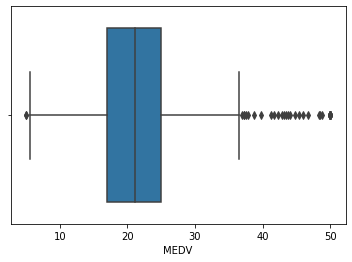

In [11]:
import seaborn as sns

sns.boxplot(data['MEDV'])

#### 323-02 : IQR값 기준 이상치

In [12]:
Q1, Q3 = data['MEDV'].quantile([0.25, 0.75])
IQR = Q3-Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

print('outlier 범위: %.2f 초과 또는 %.2f 미만' % (upper_bound, lower_bound)) 
print('outlier 개수: %.0f' % len(data[(data['MEDV']>upper_bound)|(data['MEDV']<lower_bound)]))
print('outlier 비율: %.2f' % (len(data[(data['MEDV']>upper_bound)|(data['MEDV']<lower_bound)])/len(data)))        

outlier 범위: 36.96 초과 또는 5.06 미만
outlier 개수: 40
outlier 비율: 0.08


#### 323-03 : IQR값 기준 이상치 함수화

In [13]:
def get_outlier_prop(x):

  Q1, Q3 = x.quantile([0.25, 0.75])
  IQR = Q3-Q1
  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q1 - 1.5*IQR
  outliers = x[(x>upper_bound)|(x<lower_bound)]

  return str(round(100*len(outliers)/len(x), 1))+'%'

print(data.apply(get_outlier_prop))

CRIM           13.0%
ZN             13.4%
INDUS           0.0%
CHAS            6.9%
NOX             0.0%
RM              5.9%
AGE             0.0%
DIS             1.0%
RAD             0.0%
TAX             0.0%
PTRATIO         3.0%
B              15.2%
LSTAT           1.4%
MEDV            7.9%
isHighValue     0.0%
dtype: object


#### 323-04 : 이상치 제거 예시1

In [14]:
# 예시1) IQR 값 기준으로 MEDV 변수의 이상치를 제거
Q1, Q3 = data['MEDV'].quantile([0.25, 0.75])
IQR = Q3-Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

data1 = data[(data['MEDV']<=upper_bound)&(data['MEDV']>=lower_bound)]
print(data1.shape)

(466, 15)


#### 323-05 :  이상치 제거 예시2

In [15]:
# 예시2) MEDV 변수 값이 45 이상인 경우를 이상치로 보고 제거
data2 = data[~(data['MEDV']>=45)]
print(data2.shape)

(484, 15)


### (4) 변수 변환

#### 324-01 : 변수 분포 확인

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

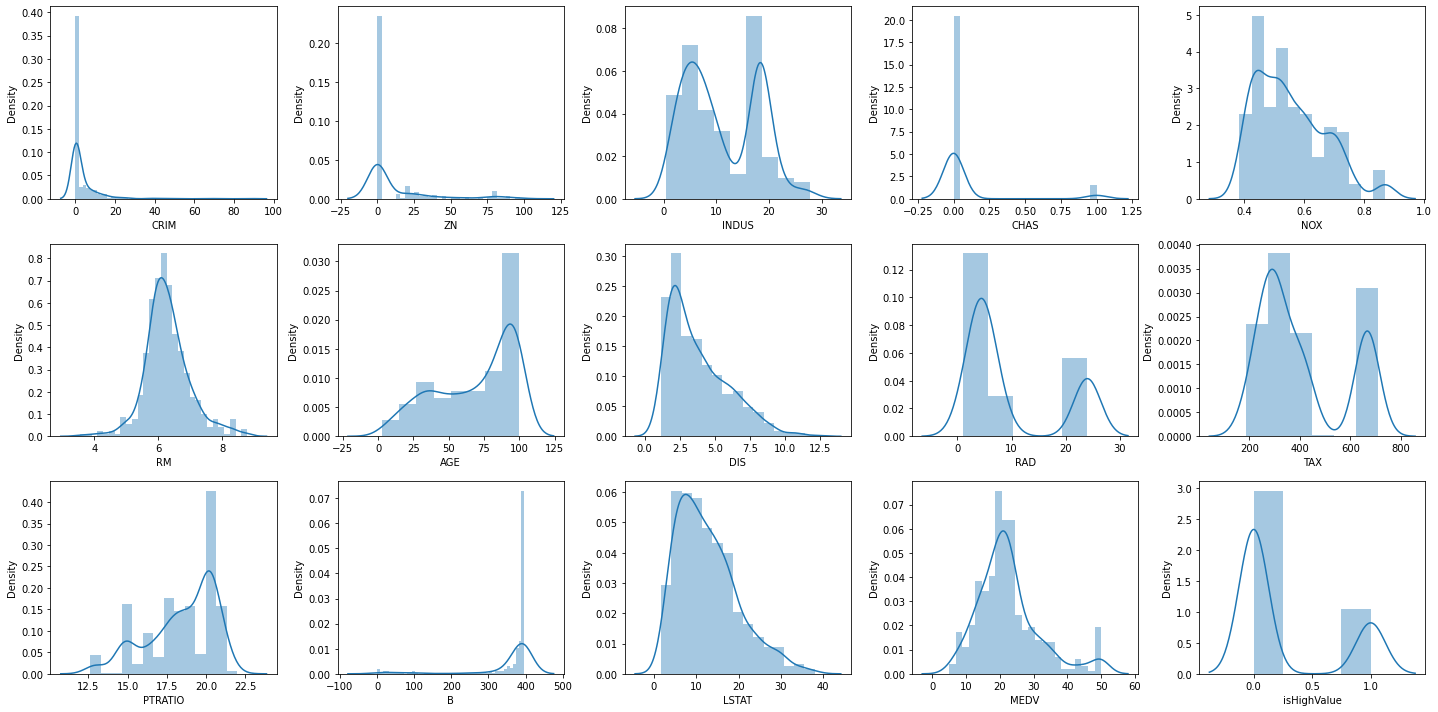

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = data.columns

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
idx = 0
for _row in range(3):
  for _col in range(5):
    if idx < len(cols):
      sns.distplot(data[cols[idx]], ax=axs[_row][_col])
      idx+=1

plt.tight_layout()


#### 324-02 : 변수 왜도 확인

In [ ]:
print(data.apply(lambda x: x.skew(), axis=0))

CRIM           5.223149
ZN             2.225666
INDUS          0.295022
CHAS           3.405904
NOX            0.729308
RM             0.403612
AGE           -0.598963
DIS            1.011781
RAD            1.004815
TAX            0.669956
PTRATIO       -0.802325
B             -2.890374
LSTAT          0.906460
MEDV           1.108098
isHighValue    1.092403
dtype: float64


#### 324-03 : 로그 변환

In [17]:
import numpy as np

data['CRIM'] = np.log1p(data['CRIM'])
print(data['CRIM'].skew())

1.2692005882725572


## 3. 회귀 모델링

### (1) 데이터 탐색

#### 331-01 : 데이터 생성

In [18]:
df_r = data.drop(['isHighValue'], axis=1) 

#### 331-02 : 변수 상관관계 확인 

In [19]:
cols = ['MEDV', 'LSTAT', 'RM', 'CHAS', 'RAD', 'TAX']
print(df_r[cols].corr())

           MEDV     LSTAT        RM      CHAS       RAD       TAX
MEDV   1.000000 -0.737663  0.695360  0.175260 -0.381626 -0.468536
LSTAT -0.737663  1.000000 -0.613808 -0.053929  0.488676  0.543993
RM     0.695360 -0.613808  1.000000  0.091251 -0.209847 -0.292048
CHAS   0.175260 -0.053929  0.091251  1.000000 -0.007368 -0.035587
RAD   -0.381626  0.488676 -0.209847 -0.007368  1.000000  0.910228
TAX   -0.468536  0.543993 -0.292048 -0.035587  0.910228  1.000000


### (2) 분석 모형 구축

#### 332-01 : 데이터 분할

In [20]:
from sklearn.model_selection import train_test_split 

X_cols = ['LSTAT', 'PTRATIO', 'TAX', 'AGE', 'NOX', 'INDUS', 'CRIM']

X = df_r[X_cols].values 
y = df_r['MEDV'].values

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.3, random_state=123)

#### 332-02 : 데이터 스케일링

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_r_scaled = scaler.fit_transform(X_train_r) 
X_test_r_scaled = scaler.transform(X_test_r)

#### 332-03 : 선형 회귀 학습

In [22]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_r_scaled, y_train_r)

LinearRegression()

#### 332-04 : coef_

In [23]:
print(model_lr.coef_)

[-32.51042803 -11.94191767  -3.84240793   5.58034429  -4.34593586
   0.98706819   6.83941179]


#### 332-05 : intercept_

In [24]:
print(model_lr.intercept_)

38.03006298623824


#### 332-06 : SVM 학습

In [25]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train_r_scaled, y_train_r)

SVR()

#### 332-07 : 랜덤 포레스트 학습

In [26]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(random_state=123)
model_rfr.fit(X_train_r_scaled, y_train_r)

RandomForestRegressor(random_state=123)

#### 332-08 : feature_importances_

In [27]:
for x, val in zip(X_cols, model_rfr.feature_importances_):
  print(f'{x} : %.3f' %val)

LSTAT : 0.718
PTRATIO : 0.070
TAX : 0.040
AGE : 0.038
NOX : 0.056
INDUS : 0.013
CRIM : 0.064


### (3) 분석 모형 평가

#### 333-01 : 예측값 생성

In [ ]:
y_pred_lr = model_lr.predict(X_test_r_scaled)
y_pred_svr = model_svr.predict(X_test_r_scaled)
y_pred_rfr = model_rfr.predict(X_test_r_scaled)

#### 333-02 : 평가지표 계산

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('-'*30)
print('선형 회귀 결과')
print('MAE: %.3f' %mean_absolute_error(y_test_r, y_pred_lr))
print('MSE: %.3f' %mean_squared_error(y_test_r, y_pred_lr))
print('MAPE: %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_lr))
print('-'*30)
print('SVM 결과')
print('MAE: %.3f' %mean_absolute_error(y_test_r, y_pred_svr))
print('MSE: %.3f' %mean_squared_error(y_test_r, y_pred_svr))
print('MAPE: %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_svr))
print('-'*30)
print('랜덤 포레스트 결과')
print('MAE: %.3f' %mean_absolute_error(y_test_r, y_pred_rfr))
print('MSE: %.3f' %mean_squared_error(y_test_r, y_pred_rfr))
print('MAPE: %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_rfr))
print('-'*30)

------------------------------
선형 회귀 결과
MAE: 4.408
MSE: 34.861
MAPE: 0.223
------------------------------
SVM 결과
MAE: 3.846
MSE: 36.890
MAPE: 0.170
------------------------------
랜덤 포레스트 결과
MAE: 2.967
MSE: 17.955
MAPE: 0.147
------------------------------


## 4. 분류 모델링

### (1) 데이터 탐색

#### 341-01 : 데이터 생성

In [28]:
df_c = data.drop(['MEDV'], axis=1) 

#### 341-02 : LSTAT변수 박스 플롯

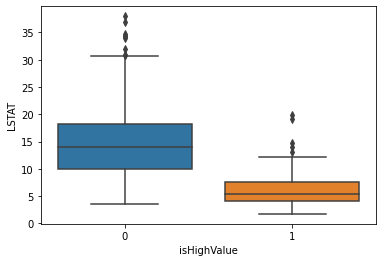

In [29]:
import seaborn as sns

sns.boxplot(x='isHighValue', y='LSTAT', data=df_c)

#### 341-03 : LSTAT변수 kde 플롯

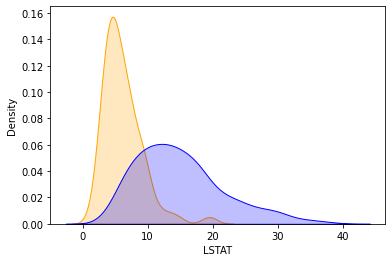

In [30]:
import seaborn as sns

sns.kdeplot(df_c.loc[df_c['isHighValue']==1, 'LSTAT'], color='orange', fill=True)
sns.kdeplot(df_c.loc[df_c['isHighValue']==0, 'LSTAT'], color='blue', fill=True)

#### 341-04 : isHighValue값별 변수 평균

In [31]:
import numpy as np

print(df_c.groupby('isHighValue').apply(np.mean).T)

isHighValue           0           1
CRIM           0.975497    0.354194
ZN             6.691176   24.602273
INDUS         12.777353    6.488485
CHAS           0.050802    0.121212
NOX            0.575957    0.494454
RM             6.028837    7.009394
AGE           73.275134   55.257576
DIS            3.593655    4.365642
RAD           10.729947    6.204545
TAX          440.788770  316.007576
PTRATIO       18.994920   16.927273
B            346.706738  384.914697
LSTAT         14.949652    6.146061
isHighValue    0.000000    1.000000


### (2) 분석 모형 구축

#### 342-01 : 데이터 분할





In [32]:
from sklearn.model_selection import train_test_split 

X_cols = ['LSTAT', 'PTRATIO', 'TAX', 'AGE', 'NOX', 'INDUS', 'CRIM']

X = data[X_cols].values 
y = data['isHighValue'].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.3, random_state=123)

#### 342-02 : 데이터 스케일링

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_c_scaled = scaler.fit_transform(X_train_c) 
X_test_c_scaled = scaler.transform(X_test_c)

#### 342-03 : 로지스틱 회귀 학습

In [34]:
from sklearn.linear_model import LogisticRegression

model_lo = LogisticRegression()
model_lo.fit(X_train_c_scaled, y_train_c)

LogisticRegression()

#### 342-04 : coef_

In [35]:
print(model_lo.coef_)

[[-4.67917856 -2.26271976 -0.80852617  0.45926521 -0.32914015 -1.36930599
   0.86834454]]


#### 342-05 : intercept_

In [36]:
print(model_lo.intercept_)

[1.90334599]


#### 342-06 : SVM 학습

In [46]:
from sklearn.svm import SVC

model_svc = SVC(probability=True)
model_svc.fit(X_train_c_scaled, y_train_c)

SVC(probability=True)

#### 342-07 : 랜덤 포레스트 학습

In [38]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=123)
model_rfc.fit(X_train_c_scaled, y_train_c)

RandomForestClassifier(random_state=123)

#### 342-08 : feature_importances_

In [40]:
for x, val in zip(X_cols, model_rfc.feature_importances_):
  print(f'{x} : %.3f' %val)

LSTAT : 0.378
PTRATIO : 0.105
TAX : 0.112
AGE : 0.087
NOX : 0.080
INDUS : 0.134
CRIM : 0.104


### (3) 분석 모형 평가

#### 343-01 : 예측값 생성

In [47]:
y_pred_lo = model_lo.predict(X_test_c_scaled)
y_pred_svc = model_svc.predict(X_test_c_scaled)
y_pred_rfc = model_rfc.predict(X_test_c_scaled)

#### 343-02 : 평가지표 계산

In [41]:
from sklearn.metrics import classification_report

print('-'*60)
print('로지스틱 회귀 결과')
print(classification_report(y_test_c, y_pred_lo, labels=[0,1]))
print('-'*60)
print('SVM 결과')
print(classification_report(y_test_c, y_pred_svc, labels=[0,1]))
print('-'*60)
print('랜덤포레스트 결과')
print(classification_report(y_test_c, y_pred_rfc, labels=[0,1]))
print('-'*60)

------------------------------------------------------------
로지스틱 회귀 결과
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       115
           1       0.89      0.65      0.75        37

    accuracy                           0.89       152
   macro avg       0.89      0.81      0.84       152
weighted avg       0.89      0.89      0.89       152

------------------------------------------------------------
SVM 결과
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.84      0.73      0.78        37

    accuracy                           0.90       152
   macro avg       0.88      0.84      0.86       152
weighted avg       0.90      0.90      0.90       152

------------------------------------------------------------
랜덤포레스트 결과
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       115
           1       0.86   

#### 343-03 : AUROC 계산

In [48]:
from sklearn.metrics import roc_auc_score

y_pred_lo = model_lo.predict_proba(X_test_c_scaled)[:, 1]
y_pred_svc = model_svc.predict_proba(X_test_c_scaled)[:, 1]
y_pred_rfc = model_rfc.predict_proba(X_test_c_scaled)[:, 1]

print('로지스틱 회귀 결과: %.3f' %roc_auc_score(y_test_c, y_pred_lo))
print('SVM 결과: %.3f' %roc_auc_score(y_test_c, y_pred_svc))
print('랜덤포레스트 결과: %.3f' %roc_auc_score(y_test_c, y_pred_rfc))

로지스틱 회귀 결과: 0.918
SVM 결과: 0.937
랜덤포레스트 결과: 0.966
